In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
%matplotlib inline
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Reading data

In [4]:
cancer = pd.read_csv("./breast-cancer-wisconsin.data", names = ["code", "clumpThickness", "uniformityCellSize",
                                                               "uniformityCellShape", "marginalAdhesion", "epithelialCellSize",
                                                               "bareNuclei", "blandChromatin", "normalNucleoli", "mitoses", "class"])
cancer = cancer.sample(frac=1)

In [6]:
#looking at the first 6 rows
cancer.head()

,code,clumpThickness,uniformityCellSize,uniformityCellShape,marginalAdhesion,epithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
508,1297327,5,1,1,1,2,1,1,1,1,2
311,688033,1,1,1,1,2,1,1,1,1,2
525,769612,3,1,1,2,2,1,1,1,1,2
456,1257470,10,6,5,8,5,10,8,6,1,4
63,1116132,6,3,4,1,5,2,3,9,1,4


In [236]:
#looking at the names of the columns (variables)
featuresNames = cancer.columns
cancer.columns

Index(['code', 'clumpThickness', 'uniformityCellSize', 'uniformityCellShape',
       'marginalAdhesion', 'epithelialCellSize', 'bareNuclei',
       'blandChromatin', 'normalNucleoli', 'mitoses', 'class', 'color'],
      dtype='object')

In [24]:
#Finding a number of missing values (denoted by "?")
len(cancer[(cancer['bareNuclei'] == "?") == True])

16

In [27]:
#Removing the 16 instances with missing values to build a new dataset (it will contain 683 rows) 
cancer = cancer[~(cancer['bareNuclei'] == "?") == True]

In [28]:
#change type of "class" variable to categorical
cancer['class'] = cancer['class'].astype("category")

#all other features should be type of float
for i in range(1,9):
    cancer.ix[:,i].fillna(method='pad')
    cancer.ix[:,i] = cancer.ix[:,i].astype("float")

In [29]:
#adding a new variable - color
cancer['color'] = np.where(cancer['class'] == 2, 'white', 'red') 

In [31]:
#splitting the data ti train and test sets (75% - train, 25% - test)
X_train, X_test, y_train, y_test = train_test_split(cancer.ix[:, (cancer.columns != 'class') & (cancer.columns != 'code') & (cancer.columns != 'color')], 
                                                    cancer['class'], 
                                                    test_size=0.25)

### Trying to understand the distribution of every feature

In [107]:
#Class distribution
print("Benign: %.1f%%"%(len(cancer[(cancer['class'] == 2)==True])*100/len(cancer)))
print("Malignant: %.1f%%"%(len(cancer[(cancer['class'] == 4)==True])*100/len(cancer)))

Benign: 65.0%
Malignant: 35.0%


In [221]:
def makeHist(var):
    plt.figure(figsize=(12, 8))
    ax = X_train[var].T.plot(kind="hist", width=0.9)
    ax.set_title(var)
    ax.set_xlabel("Domain")
    ax.set_xlim(1,10)
    ax.set_xticks([0.6+0.9*i for i in range(1,11)])
    ax.set_xticklabels([i for i in range(1,11)])

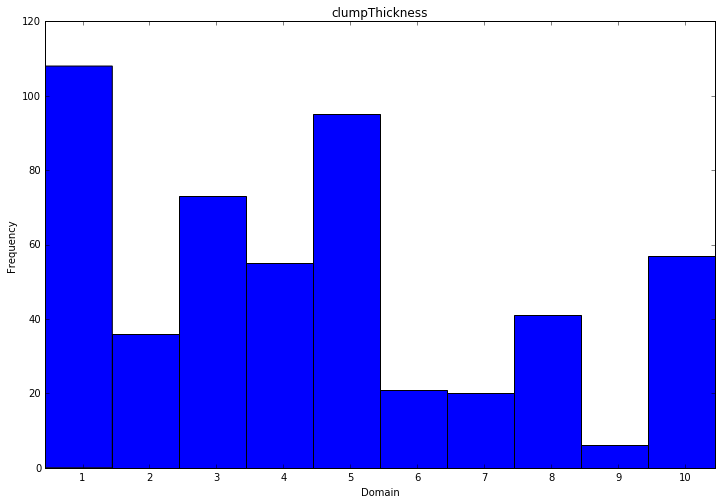

In [222]:
#histogram summaries for the clump thickness attributes in the Train set
makeHist("clumpThickness")

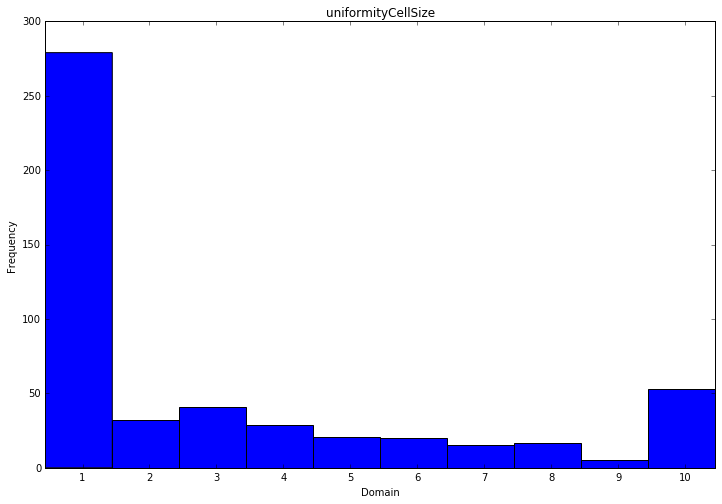

In [223]:
#histogram summaries for the uniformity cell size attributes in the Train set
makeHist("uniformityCellSize")

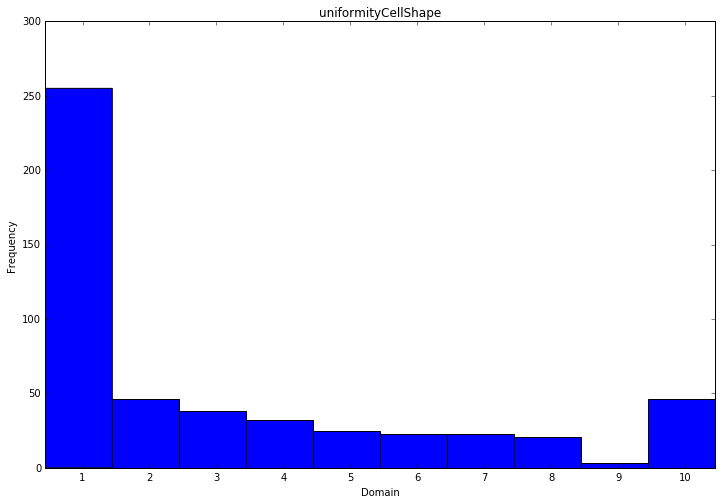

In [224]:
#histogram summaries for the uniformity cell shape attributes in the Train set
makeHist("uniformityCellShape")

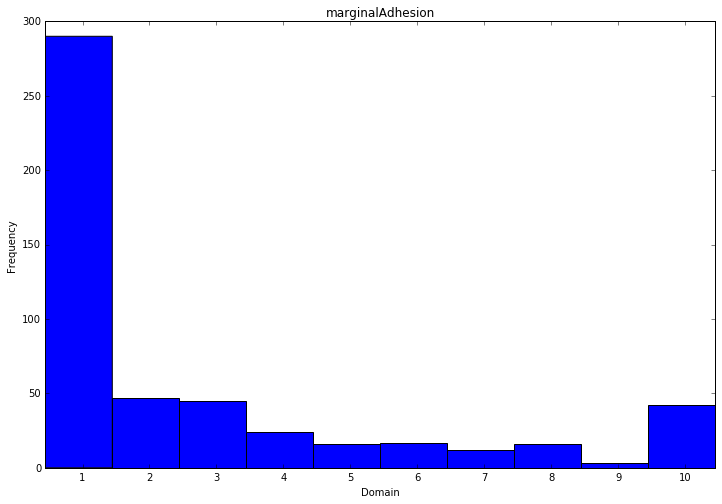

In [225]:
#histogram summaries for the marginalAdhesion attributes in the Train set
makeHist("marginalAdhesion")

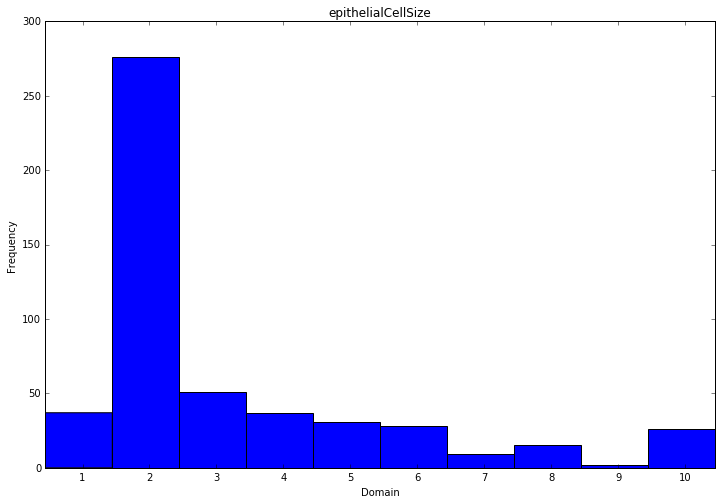

In [227]:
#histogram summaries for the single epithelial cell size attributes in the Train set
makeHist("epithelialCellSize")

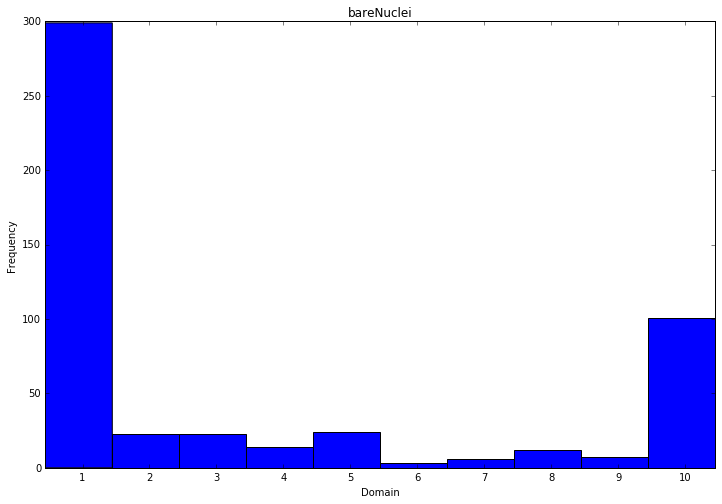

In [228]:
#histogram summaries for the single bare Nuclei attributes in the Train set
makeHist("bareNuclei")

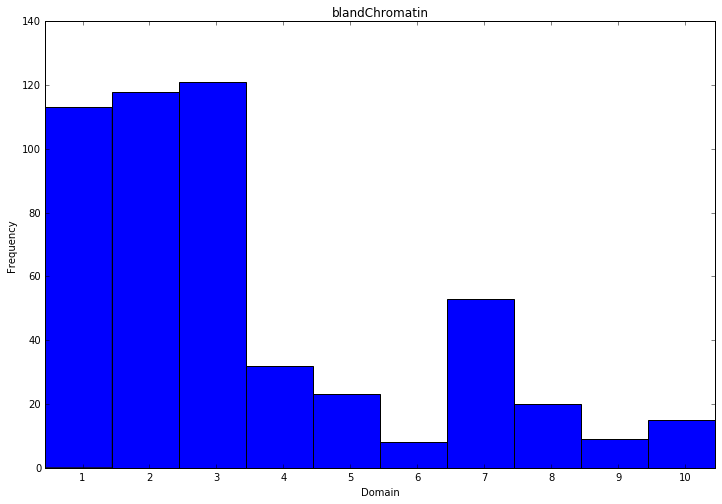

In [229]:
#histogram summaries for the single bland Chromatin attributes in the Train set
makeHist("blandChromatin")

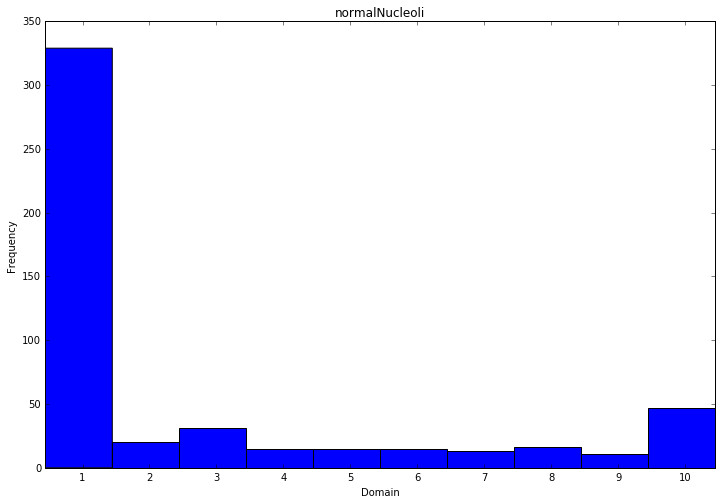

In [230]:
#histogram summaries for the normal Nucleoli attributes in the Train set
makeHist("normalNucleoli")

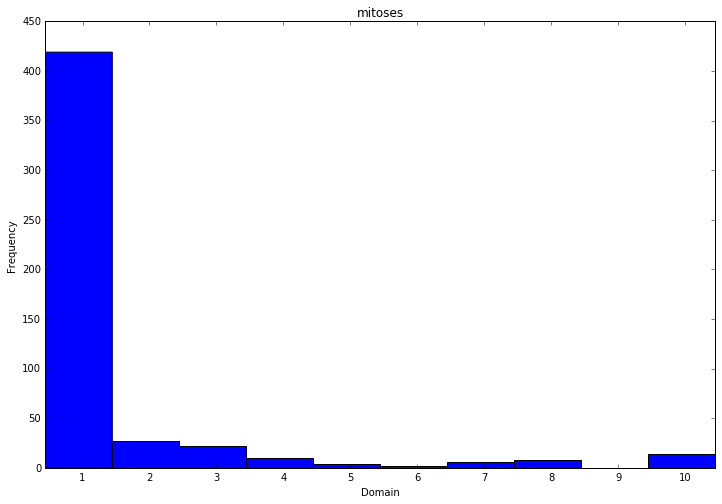

In [231]:
#histogram summaries for the mitoses attributes in the Train set
makeHist("mitoses")

In [245]:
def retDistrStatFeature(var):
    retVector = []
    for i in range(1,11):
        retVector.append(len(cancer[cancer[var]==i]))
    return retVector

In [280]:
#making a summary table
d = {"Domain": [i for i in range(1,11)]}
for feature in featuresNames:
    if feature not in ["code", "class", "color"]:
        d[feature] = retDistrStatFeature(feature)
df = pd.DataFrame(d)
df = df.set_index(["Domain"])
#df = df.T
df["Sum"] = [df.ix[i].sum() for i in range(1,11)]
df = df.T
df

Domain,1,2,3,4,5,6,7,8,9,10
bareNuclei,402,30,28,19,30,4,8,21,9,132
blandChromatin,150,160,161,39,34,9,71,28,11,20
clumpThickness,139,50,104,79,128,33,23,44,14,69
epithelialCellSize,44,376,71,48,39,40,11,21,2,31
marginalAdhesion,393,58,58,33,23,21,13,25,4,55
mitoses,563,35,33,12,6,3,9,8,0,14
normalNucleoli,432,36,42,18,19,22,16,23,15,60
uniformityCellShape,346,58,53,43,32,29,30,27,7,58
uniformityCellSize,373,45,52,38,30,25,19,28,6,67
Sum,2842,848,602,329,341,186,200,225,68,506


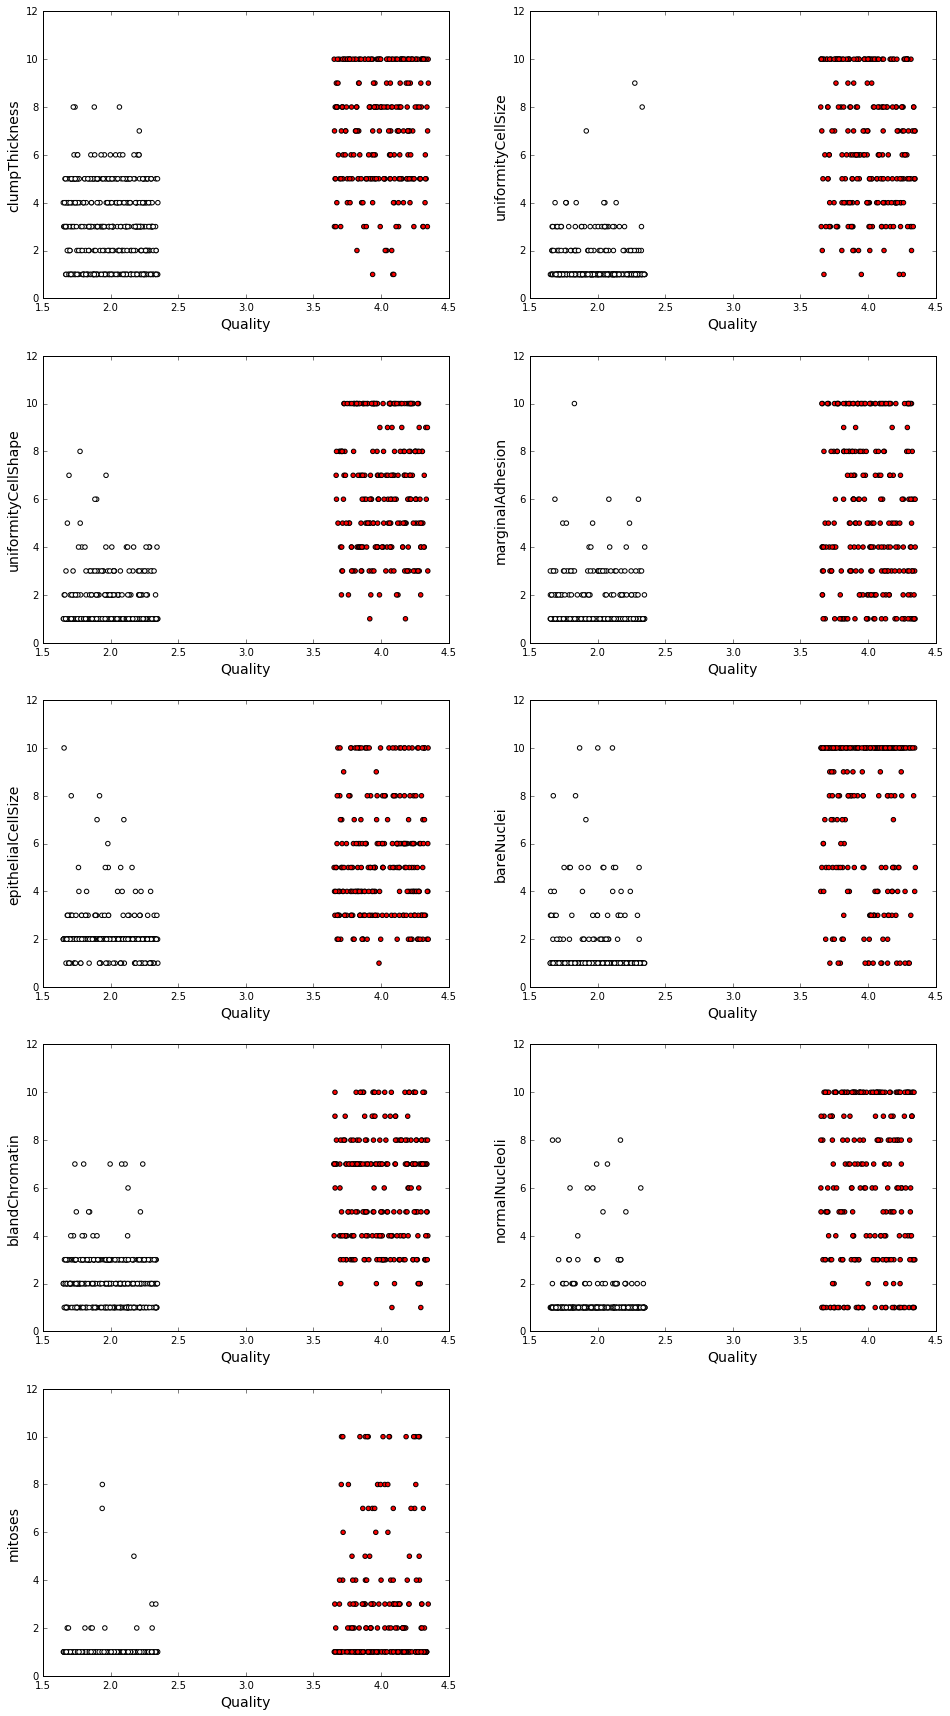

In [101]:
def jitter(arr):
    return arr + np.random.uniform(low=-0.35, high=0.35, size=len(arr))

pyplot.figure(figsize(16, 36))
for i in range (1, 10):
    pyplot.subplot(6, 2, i)
    pyplot.scatter(jitter(cancer['class']), cancer.ix[:, i], color = cancer['color'], edgecolors="black")
    pyplot.xlabel('Quality', fontsize=14)
    pyplot.ylabel(str(cancer.columns[i]), fontsize=14)

## Линейная регрессия

In [336]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ошибки прогнозирования

In [337]:
np.sqrt(mean_squared_error(lm.predict(X_train), y_train))

0.38358692190515581

In [338]:
np.sqrt(mean_squared_error(lm.predict(X_test), y_test))

0.36600099039913025

Классы и их предсказания линейной моделью

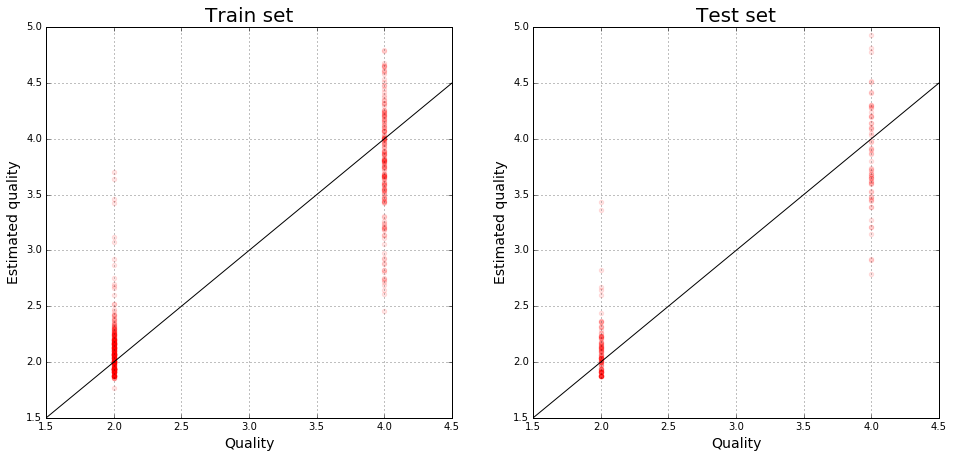

In [339]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

Посчитаем коэффициент детерминации — долю объяснённой моделью дисперсии отклика:

In [340]:
lm.score(X_test, y_test)

0.85607625679968735

## Случайный лес

In [341]:
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=4)

In [342]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [343]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.24421526572192492

In [344]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.32233423181950593

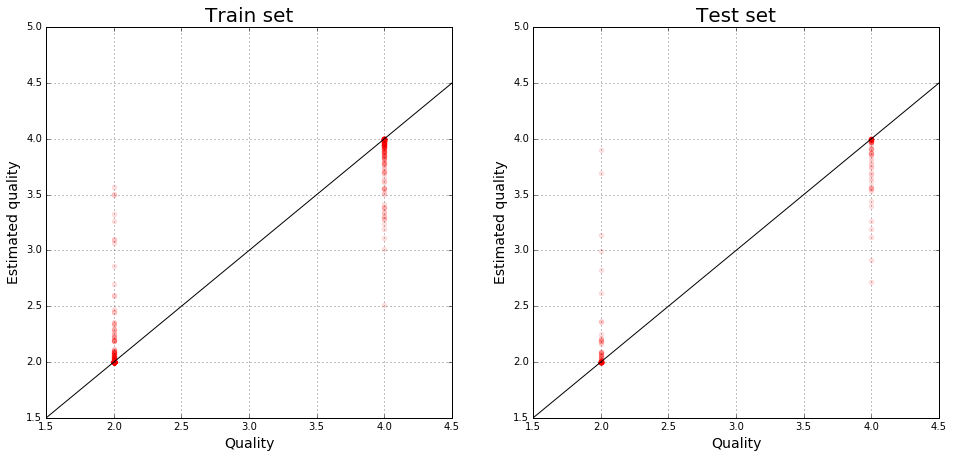

In [345]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(1.5,4.5)
pyplot.ylim(1.5,5.0)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [346]:
rf.score(X_test, y_test)

0.88837003607748743

In [347]:
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

8.2795706890043309e-05

In [348]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.061332216880808858, 0.18092717819142201)

In [349]:
importances = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
1,uniformityCellSize,0.547688
2,uniformityCellShape,0.283270
5,bareNuclei,0.076681
0,clumpThickness,0.024422
6,blandChromatin,0.023126
7,normalNucleoli,0.019346
4,epithelialCellSize,0.014657
3,marginalAdhesion,0.010189
8,mitoses,0.000621


Самый значимый признак - uniformityCellSize.